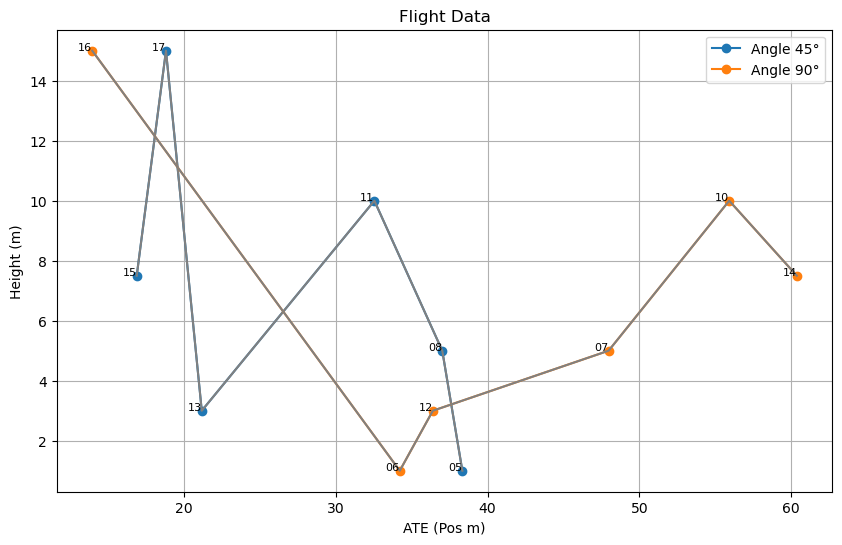

In [1]:
import matplotlib.pyplot as plt
import numpy as np

auto = False

# Daten aus der Tabelle
if auto:
    flight_nr = ['05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '16', '17']
    height = [1, 1, 5, 5, 10, 10, 3, 3, 7.5, 7.5, 15, 15]
    angle = [45, 90, 90, 45, 90, 45, 90, 45, 90, 45, 90, 45]
    ate_pos = [36.063, 19.442, 24.593, 26.263, 34.464, 22.133, 41.012, 24.230, 32.138, 12.703, 10.918, 16.550]
else:
    flight_nr = ['05', '06', '07', '08', '10', '11', '12', '13', '14', '15', '16', '17']
    height = [1, 1, 5, 5, 10, 10, 3, 3, 7.5, 7.5, 15, 15]
    angle = [45, 90, 90, 45, 90, 45, 90, 45, 90, 45, 90, 45]
    ate_pos = [38.337, 34.213, 47.974, 37.014, 55.922, 32.540, 36.393, 21.165, 60.376, 16.879, 13.949, 18.807]

# Daten bereinigen und gruppieren
data_groups = {}
for i, val in enumerate(angle):
    if not np.isnan(ate_pos[i]):
        if val not in data_groups:
            data_groups[val] = {'ate_pos': [], 'height': [], 'flight_nr': []}
        data_groups[val]['ate_pos'].append(ate_pos[i])
        data_groups[val]['height'].append(height[i])
        data_groups[val]['flight_nr'].append(flight_nr[i])

# Plot erstellen
plt.figure(figsize=(10, 6))

# Linien für jede Winkelgruppe zeichnen
for angle_val, data in data_groups.items():
    sorted_indices = np.argsort(data['ate_pos']) # sort indices based on ate_pos
    sorted_ate_pos = [data['ate_pos'][i] for i in sorted_indices]
    sorted_height = [data['height'][i] for i in sorted_indices]
    plt.plot(sorted_ate_pos, sorted_height, marker='o', label=f'Angle {angle_val}°')
    if angle_val == 45 or angle_val == 90:
        # Verbinde Punkte mit Linien in aufsteigender Reihenfolge der ATE
        sorted_points = sorted(zip(sorted_ate_pos, sorted_height))
        sorted_ate_pos, sorted_height = zip(*sorted_points)
        plt.plot(sorted_ate_pos, sorted_height, linestyle='-', color='gray')

# Achsen beschriften und Titel hinzufügen
plt.xlabel('ATE (Pos m)')
plt.ylabel('Height (m)')
plt.title('Flight Data')

# Punkte beschriften
for angle_val, data in data_groups.items():
    for i, txt in enumerate(data['flight_nr']):
        plt.text(data['ate_pos'][i], data['height'][i], txt, ha='right', fontsize=8)

# Legende hinzufügen
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Plot anzeigen
plt.show()


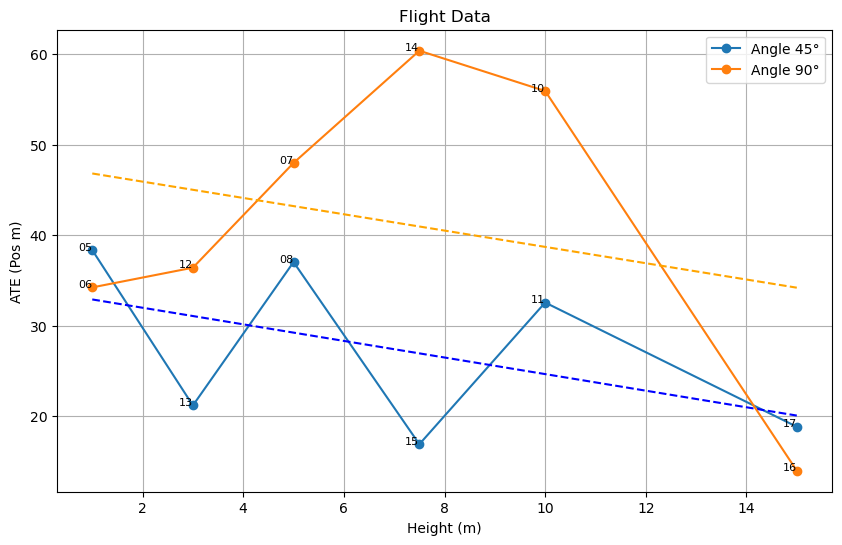

In [2]:
from scipy import stats

# Daten bereinigen und gruppieren
data_groups = {}
for i, val in enumerate(angle):
    if not np.isnan(ate_pos[i]):
        if val not in data_groups:
            data_groups[val] = {'ate_pos': [], 'height': [], 'flight_nr': []}
        data_groups[val]['ate_pos'].append(ate_pos[i])
        data_groups[val]['height'].append(height[i])
        data_groups[val]['flight_nr'].append(flight_nr[i])

# Plot erstellen
plt.figure(figsize=(10, 6))

# Linien für 45° und 90° zeichnen und Trends berechnen
for angle_val, data in data_groups.items():
    sorted_indices = np.argsort(data['height']) # sort indices based on height
    sorted_ate_pos = [data['ate_pos'][i] for i in sorted_indices]
    sorted_height = [data['height'][i] for i in sorted_indices]
    if angle_val == 45:
        plt.plot(sorted_height, sorted_ate_pos, marker='o', label='Angle 45°')
        slope, intercept, _, _, _ = stats.linregress(sorted_height, sorted_ate_pos)
        plt.plot(sorted_height, slope*np.array(sorted_height) + intercept, linestyle='--', color='blue')
    elif angle_val == 90:
        plt.plot(sorted_height, sorted_ate_pos, marker='o', label='Angle 90°')
        slope, intercept, _, _, _ = stats.linregress(sorted_height, sorted_ate_pos)
        plt.plot(sorted_height, slope*np.array(sorted_height) + intercept, linestyle='--', color='orange')

# Achsen beschriften und Titel hinzufügen
plt.xlabel('Height (m)')
plt.ylabel('ATE (Pos m)')
plt.title('Flight Data')

# Punkte beschriften
for angle_val, data in data_groups.items():
    for i, txt in enumerate(data['flight_nr']):
        plt.text(data['height'][i], data['ate_pos'][i], txt, ha='right', fontsize=8)

# Legende hinzufügen
plt.legend()

# Gitter hinzufügen
plt.grid(True)

# Plot anzeigen
plt.show()

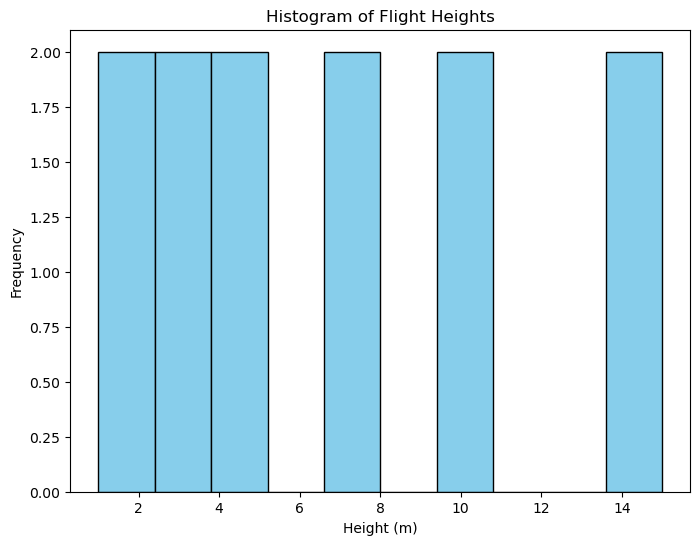

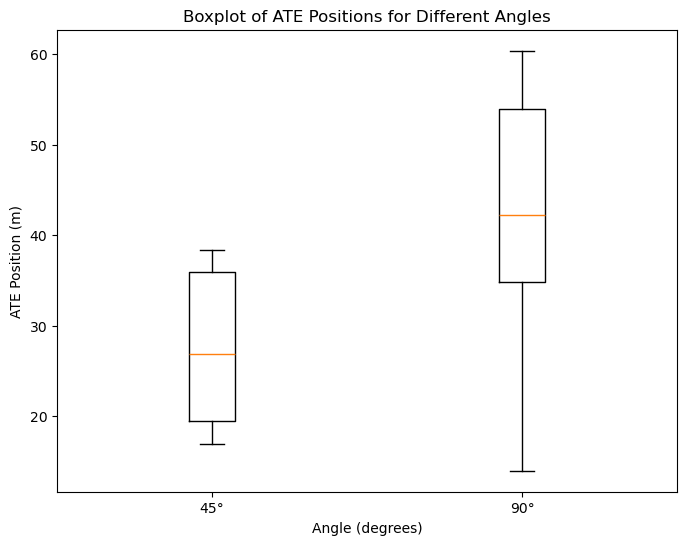

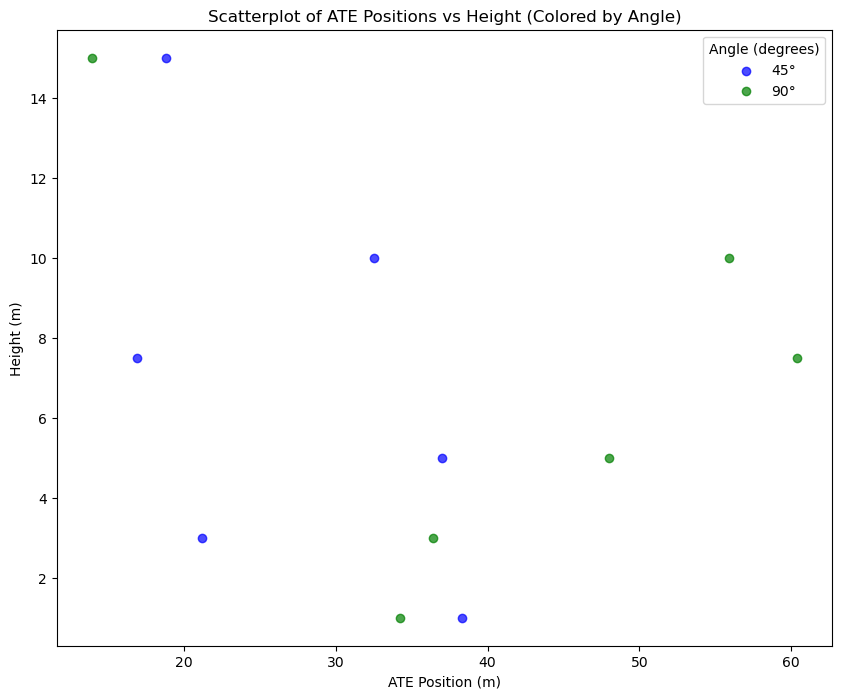

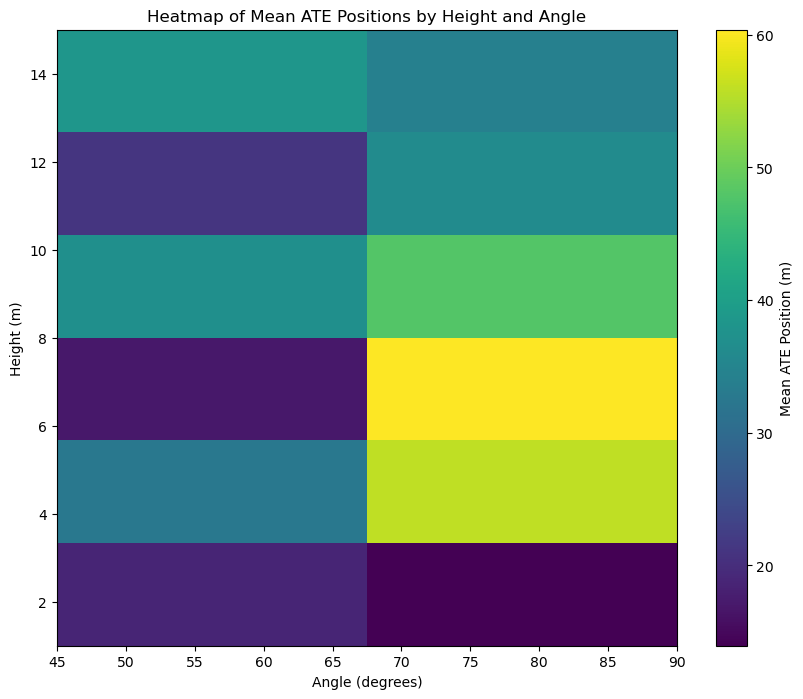

In [3]:
import pandas as pd

# Daten in DataFrame konvertieren
df = pd.DataFrame({'Flight': flight_nr, 'Height': height, 'Angle': angle, 'ATE_Pos': ate_pos})

# Histogramm der Flughöhen
plt.figure(figsize=(8, 6))
plt.hist(df['Height'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Heights')
plt.show()

# Boxplot der ATE-Positionen für verschiedene Winkel
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Angle'] == 45]['ATE_Pos'], df[df['Angle'] == 90]['ATE_Pos']], labels=['45°', '90°'])
plt.xlabel('Angle (degrees)')
plt.ylabel('ATE Position (m)')
plt.title('Boxplot of ATE Positions for Different Angles')
plt.show()

# Scatterplot der ATE-Positionen gegen die Höhe mit Farbcodierung nach Winkel
plt.figure(figsize=(10, 8))
colors = {45: 'blue', 90: 'green'}
for angle_val, color in colors.items():
    subset = df[df['Angle'] == angle_val]
    plt.scatter(subset['ATE_Pos'], subset['Height'], color=color, label=f'{angle_val}°', alpha=0.7)
plt.xlabel('ATE Position (m)')
plt.ylabel('Height (m)')
plt.title('Scatterplot of ATE Positions vs Height (Colored by Angle)')
plt.legend(title='Angle (degrees)')
plt.show()

# Heatmap der ATE-Positionen in Abhängigkeit von Flughöhe und Winkel
pivot_df = df.pivot_table(index='Height', columns='Angle', values='ATE_Pos', aggfunc='mean')
plt.figure(figsize=(10, 8))
plt.imshow(pivot_df, cmap='viridis', aspect='auto', extent=[df['Angle'].min(), df['Angle'].max(), df['Height'].min(), df['Height'].max()])
plt.colorbar(label='Mean ATE Position (m)')
plt.xlabel('Angle (degrees)')
plt.ylabel('Height (m)')
plt.title('Heatmap of Mean ATE Positions by Height and Angle')
plt.show()
